sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

       species  petal_ratio
0       setosa     7.000000
1       setosa     7.000000
2       setosa     6.500000
3       setosa     7.500000
4       setosa     7.000000
..         ...          ...
145  virginica     2.260870
146  virginica     2.631579
147  virginica     2.600000
148  virginica     2.347826
149  virginica     2.833333

[150 rows x 2 columns]


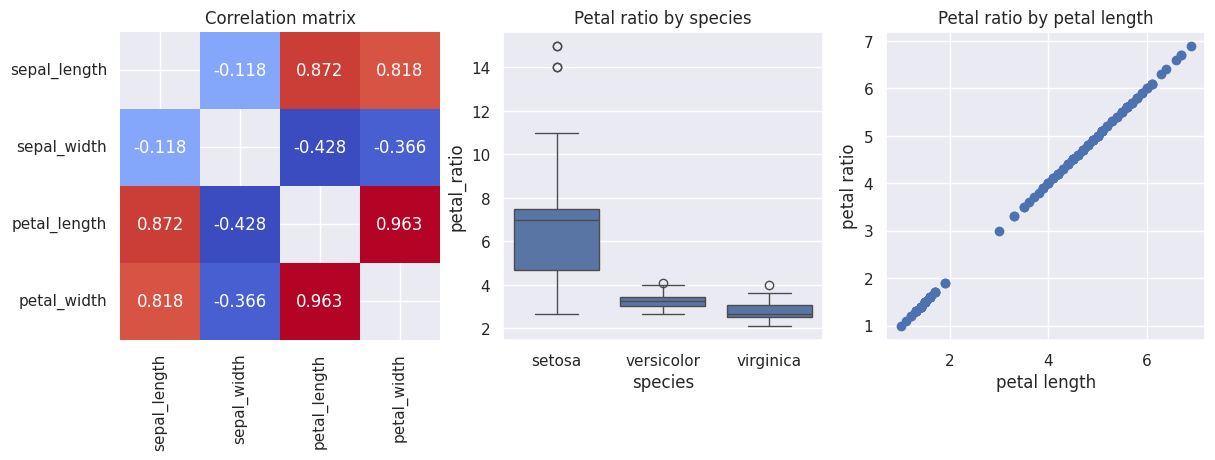

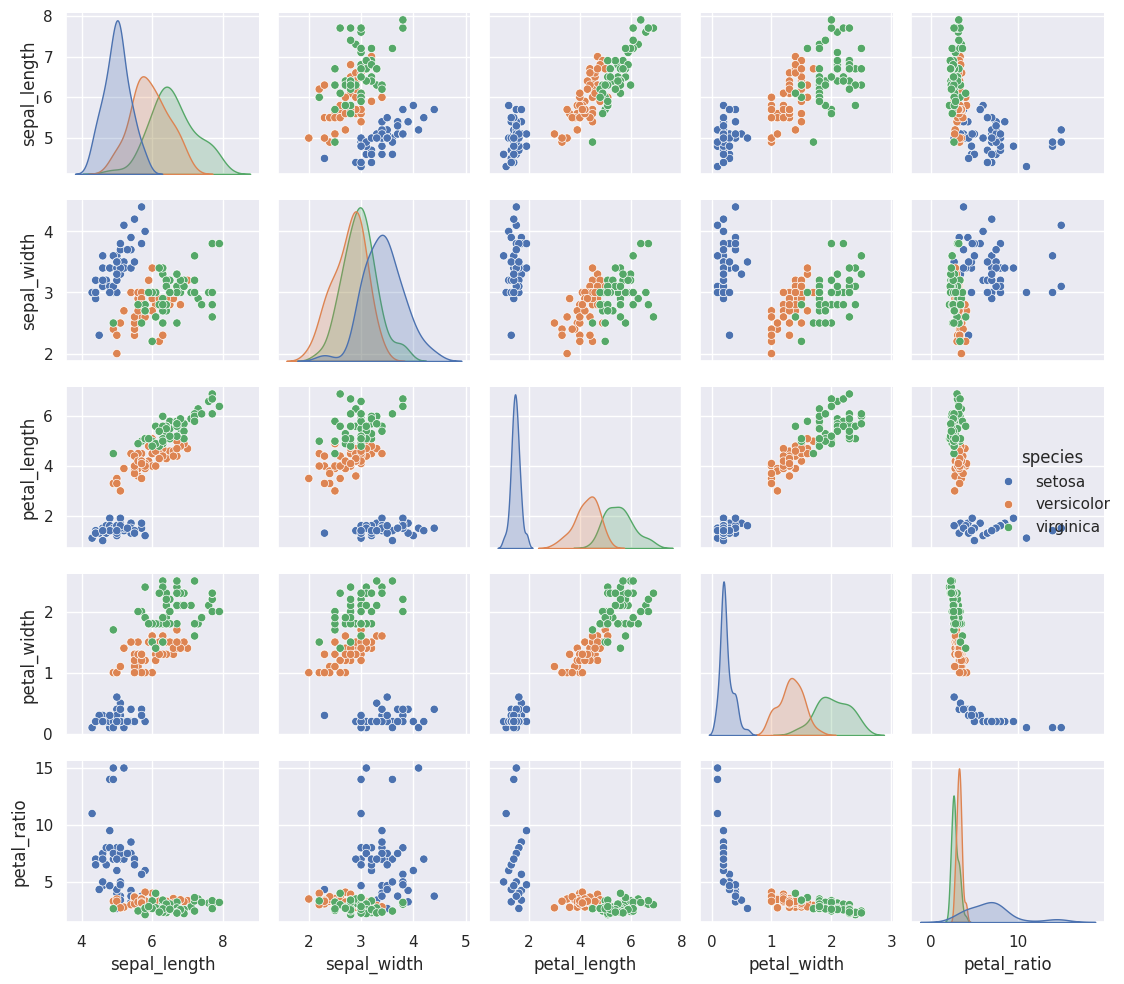

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# No.1
sns.set_theme()
def is_outlier(series):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    return (series < lower) | (series > upper)

# part1 - Data Collection & Preparation
iris_df = sns.load_dataset("iris")
# print(iris_df.apply(lambda col : len(col)))

print(iris_df.replace(["", " ", "\xa0"], np.nan).isna().sum(), end='\n\n')

# fill NaN values
if iris_df.replace(["", " ", "\xa0"], np.nan).isna().any().any():
    iris_df.select_dtypes(include='number').apply(lambda col: col.fillna(col.mean() , inplace=True), end='\n\n')

# drop outliers
outlier_indices = iris_df.select_dtypes(include='number').apply(is_outlier)
iris_df.select_dtypes(include='number').drop(outlier_indices[outlier_indices].index, inplace=True)

iris_df_corr = iris_df[ ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] ].corr()
np.fill_diagonal(iris_df_corr.values, np.nan)

# part2 - Add new feature
iris_df['petal_ratio'] = iris_df['petal_length'] / iris_df['petal_width']
print(iris_df[ ['species', 'petal_ratio'] ])

# part3 - Visualization
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
ax[0].set_title('Correlation matrix')
sns.heatmap(iris_df_corr, annot=True, cmap='coolwarm', fmt='.3f', cbar=False, ax= ax[0])

sns.pairplot(iris_df, hue='species', height=2)

sns.boxplot(iris_df, x='species', y='petal_ratio', ax=ax[1])
ax[1].set_title('Petal ratio by species')

ax[2].scatter(iris_df['petal_length'], iris_df['petal_length'])
ax[2].set_title('Petal ratio by petal length')
ax[2].set_xlabel('petal length')
ax[2].set_ylabel('petal ratio')

plt.tight_layout()
plt.show();


In [4]:
# No.2

# part1
global_temp_by_country_df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

# global_temp_by_country_df.apply(lambda col: col.fillna(col.mean(), inplace=True))
# part2
global_temp_by_country_df['dt'] = pd.to_datetime(global_temp_by_country_df['dt'], format='%Y-%m-%d')
bins = ((global_temp_by_country_df['dt'].dt.year // 10) * 10).unique()
bins = np.append(bins, bins[-1] + 10)
labels = np.vectorize(lambda x: x + 's')(bins[:-1].astype(str))

global_temp_by_country_df['Decades'] = pd.cut(global_temp_by_country_df['dt'].dt.year, bins=bins, labels=labels)

# part3
global_temp_by_country_df_filtered = global_temp_by_country_df.groupby('Country').filter(lambda x: x['dt'].dt.year.max() - x['dt'].dt.year.min() >= 100)

# print(global_temp_by_country_df[ global_temp_by_country_df.groupby('Country')['dt'].transform(lambda x: x.dt.year.max() - x.dt.year.min()).values < 100 ])
# print(global_temp_by_country_df_filtered[ global_temp_by_country_df_filtered['Country'] == 'Antarctica'])

print(global_temp_by_country_df_filtered.columns)
nn = global_temp_by_country_df_filtered.groupby('Decades', observed=False)['AverageTemperature'].mean()
print(nn)



Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country',
       'Decades'],
      dtype='object')
Decades
1740s     7.910779
1750s     8.589471
1760s     8.462773
1770s     8.738532
1780s     9.220352
1790s    10.364293
1800s    10.345430
1810s     9.962543
1820s    13.445411
1830s    11.433753
1840s    14.656288
1850s    16.686497
1860s    16.644643
1870s    17.443773
1880s    17.867901
1890s    18.319186
1900s    18.349712
1910s    18.498856
1920s    18.655925
1930s    18.775745
1940s    18.857112
1950s    18.862984
1960s    18.833613
1970s    18.865081
1980s    19.092888
1990s    19.324277
2000s    19.647012
2010s    19.694305
Name: AverageTemperature, dtype: float64


columns:  ['ReviewText']
Nan values count:  ReviewText    0
dtype: int64
                                   ReviewText  TextLength  WordCount
0    This product is amazing and very useful!          40          7
1  I didn’t like the quality of the material.          42          8
2                       Good value for money.          21          4
3       Terrible experience, won’t buy again.          37          5
4                        Absolutely loved it!          20          3
5           The product broke after one week.          33          6
6          Really happy with the performance.          34          5
7                        Not worth the price.          20          4
8  Excellent build quality and fast delivery.          42          6
9           Disappointing experience overall.          33          3

tokens:
 ['this', 'product', 'is', 'amazing', 'and', 'very', 'useful', 'i', 'didn’t', 'like', 'the', 'quality', 'of', 'the', 'material', 'good', 'value', 'for', 'money

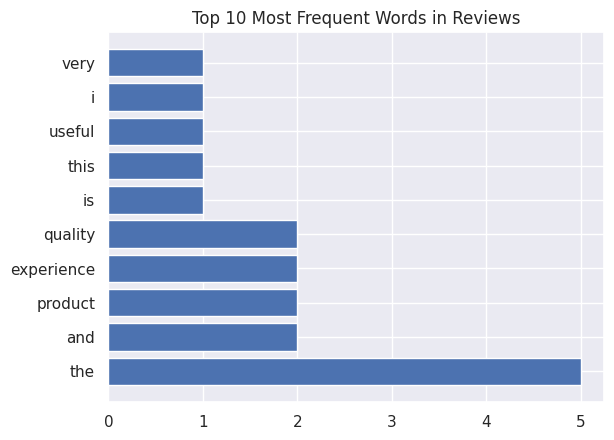

In [5]:
# No.3
from collections import Counter

# part1
reviews_df = pd.read_csv('reviews.csv')
print('columns: ', reviews_df.columns.values)

print('Nan values count: ', reviews_df.isna().sum())

# part2
reviews_df['TextLength'] = reviews_df['ReviewText'].str.len()
reviews_df['WordCount'] = reviews_df['ReviewText'].str.split().str.len()
print(reviews_df, end='\n\n')

txt = ''.join(reviews_df['ReviewText'].tolist())
txt = txt.replace(',', ' ').replace('.', ' ').replace('!', ' ')

print('tokens:\n', txt.lower().split(), end='\n\n')

word_count_dict = dict(Counter(txt.lower().split()))
word_count = pd.Series(data=word_count_dict.values(), index=word_count_dict.keys())
print('word_count:\n', word_count.sort_values(ascending=False).head(10), end='\n\n')

plt.figure()
plt.axes()
plt.barh(word_count.sort_values(ascending=False).head(10).index, word_count.sort_values(ascending=False).head(10), )
plt.title('Top 10 Most Frequent Words in Reviews')
plt.show();

<class 'str'>



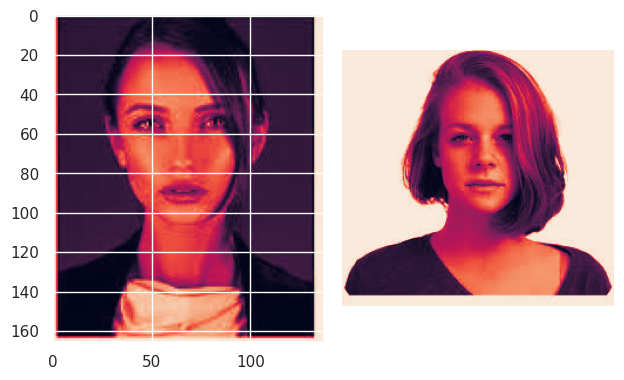

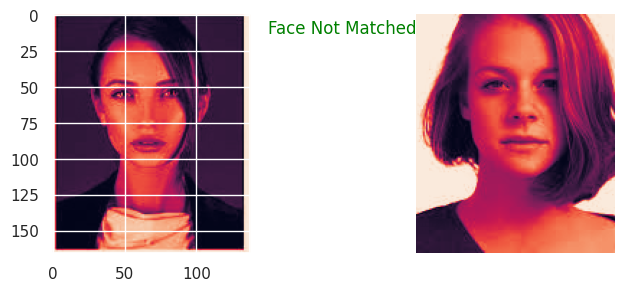

<class 'str'>



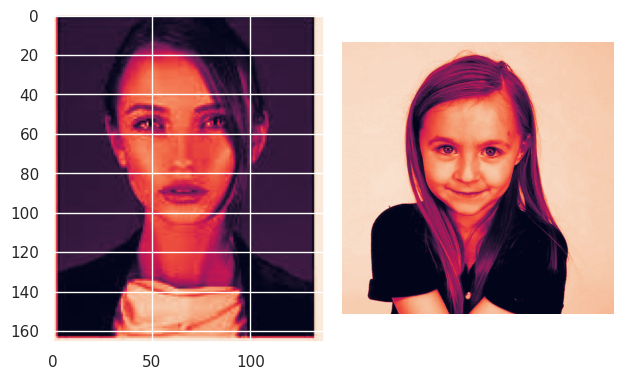

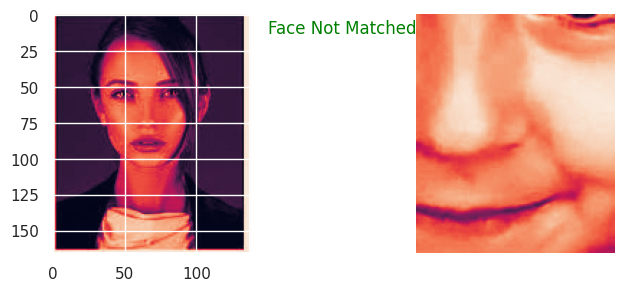

<class 'str'>



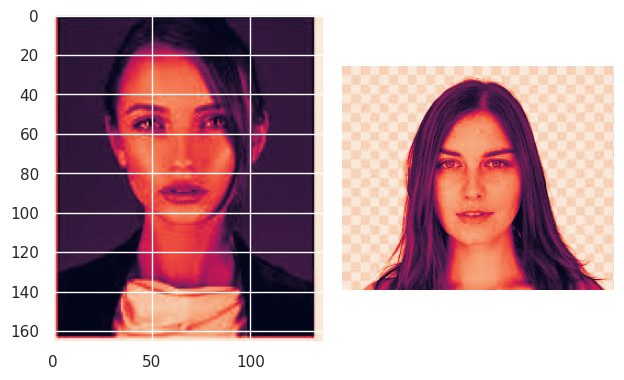

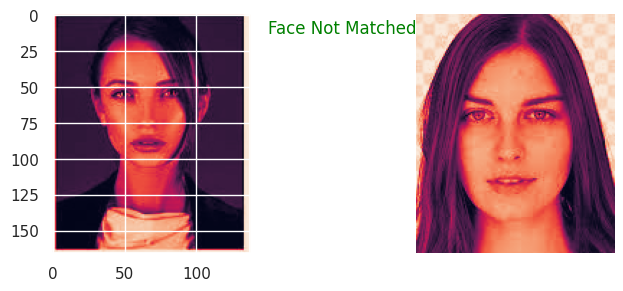

<class 'str'>



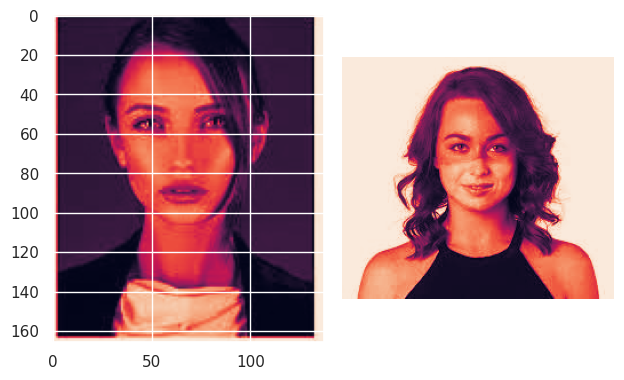

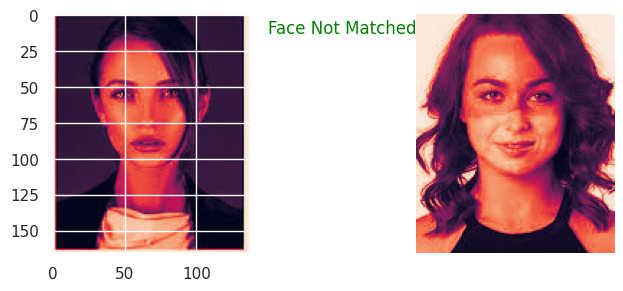

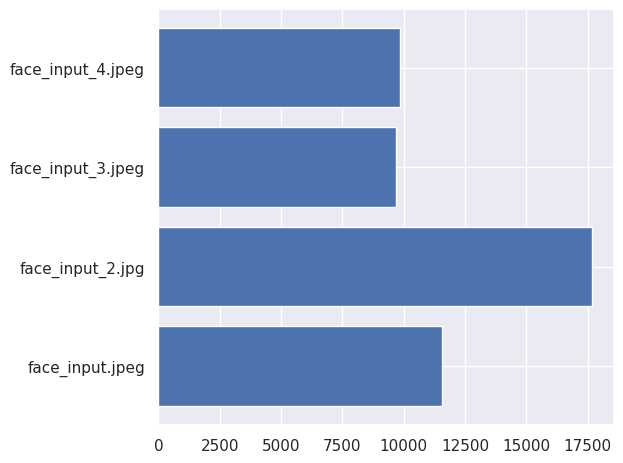

In [6]:
# No.4
face_ref = plt.imread('face_reference.jpeg')
face_input_series = pd.Series(['face_input.jpeg', 'face_input_2.jpg', 'face_input_3.jpeg', 'face_input_4.jpeg'])

MAE_THRESHOLD = 50
MSE_THRESHOLD = 3000
face_df = pd.DataFrame(columns=['MAE', 'MSE'], index=face_input_series)

if face_ref.ndim == 3 and face_ref.shape[2] in [3, 4]:
    face_ref = np.dot(face_ref[..., :3], [0.299, 0.587, 0.114])

for item in face_input_series:
    face_in = plt.imread(item)
    print(type(item), end='\n\n')
    if face_in.ndim == 3 and face_in.shape[2] in [3, 4]:
        face_in = np.dot(face_in[..., :3], [0.299, 0.587, 0.114])

    face_ref_height, face_ref_width = face_ref.shape[0], face_ref.shape[1]
    face_in_height, face_in_width = face_in.shape[0], face_in.shape[1]

    new_height = min(face_ref_height, face_in_height)
    new_width = min(face_ref_width, face_in_width)

    face_ref_height_start_index = abs(new_height - face_ref_height) // 2
    face_ref_height_end_index = abs(face_ref_height - face_ref_height_start_index)

    face_ref_width_start_index = abs(new_width - face_ref_width) // 2
    face_ref_width_end_index = abs(face_ref_width - face_ref_width_start_index)


    face_in_height_start_index = abs(new_height - face_in_height) // 2
    face_in_height_end_index = abs(face_in_height - face_in_height_start_index)

    face_in_width_start_index = abs(new_width - face_in_width) // 2
    face_in_width_end_index = abs(face_in_width - face_in_width_start_index)

    face_ref_resized = face_ref[ face_ref_height_start_index: face_ref_height_end_index , face_ref_width_start_index: face_ref_width_end_index ]
    face_in_resized = face_in[ face_in_height_start_index: face_in_height_end_index, face_in_width_start_index: face_in_width_end_index ]

    MAE = np.mean(np.abs(face_ref_resized - face_in_resized))
    MSE = np.mean(np.abs(face_ref_resized - face_in_resized) ** 2)

    face_df.loc[item, 'MAE'] = MAE
    face_df.loc[item, 'MSE'] = MSE

    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(face_ref)
    ax[1].imshow(face_in)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    fig1, ax1 = plt.subplots(1, 2)
    ax1[0].imshow(face_ref_resized)
    ax1[1].imshow(face_in_resized)
    plt.axis('off')

    if MAE < MAE_THRESHOLD or MSE < MSE_THRESHOLD:
        txt = 'Face Matched'
    else:
        txt = 'Face Not Matched'
    plt.text(0, 3, txt, color='green', verticalalignment='top', horizontalalignment='right')
    plt.tight_layout()
    plt.show()

plt.figure()
plt.axes()
plt.barh(face_df.index, face_df['MSE'])
plt.tight_layout()
plt.show();